In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt


In [2]:
figs = os.path.join('../../plots')
file = os.path.join('../../results/raw-results.csv')

df = pd.read_csv(file)

sns.set_style("ticks")

sns.set_context("paper", font_scale=2.8)   

In [3]:
df_invo = df[df['Experiment'] == 'INVO']

In [4]:
f = sns.color_palette("Blues", 10)[0]
s = sns.color_palette("Blues", 10)[-3]

<Figure size 432x288 with 0 Axes>

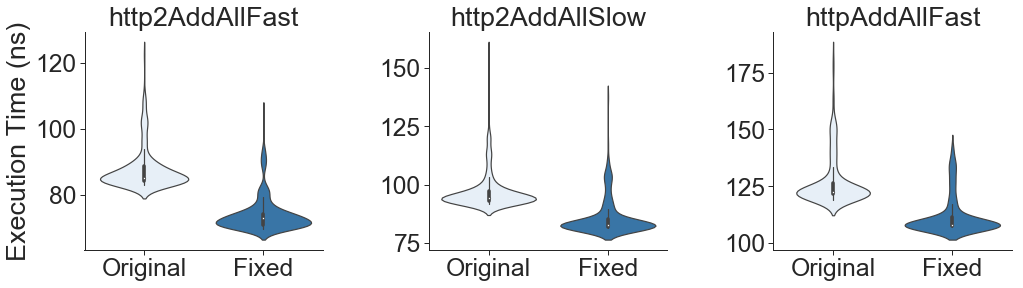

In [5]:
plt.clf()

sns.set_style("ticks")


affected = ['httpAddAllFast', 'http2AddAllFast', 'http2AddAllSlow'] 
params = [' (exampleHeader = THREE)']
df_invo_p = df_invo[df_invo['Full params'] == ' (exampleHeader = THREE)']
       
headers_bench = df_invo_p.query('Class=="HeadersBenchmark" and Method in @affected')
cat = sns.catplot(data=headers_bench, col='Method', y='Score', x='Version', kind='violin', sharey=False, aspect=1, 
                  legend=False, palette=[f, s])
cat.set_axis_labels("", "Execution Time (ns)")
cat.set_xticklabels(['Original', 'Fixed'])
cat.set_titles("{col_name}")

#plt.show()
plt.savefig(os.path.join(figs, 'INVO-netty-directlyaffected.pdf'))


C:\Users\diego\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


<Figure size 432x288 with 0 Axes>

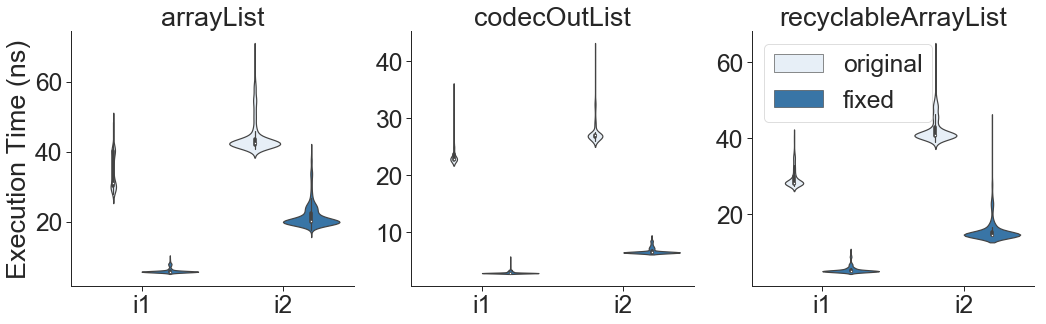

In [6]:
%matplotlib inline
plt.clf()

sns.set_style("ticks")

import math

codec_bench = df_invo[df_invo['Class'] == 'CodecOutputListBenchmark']

# From Thrpt to Execution time (ns)
codec_bench['Score Norm'] = 1e9 / codec_bench['Score']
codec_bench = codec_bench.replace('fixed_full', 'fixed')

#headers_table = pd.pivot_table(data=headers_bench, values='Score', index=['Version','Method', 'Iteration', 'Fork', 'Trial'])
cat = sns.catplot(data=codec_bench, x='Full params', y='Score Norm', col='Method', hue='Version', 
                  ci=95, kind='violin', sharey=False, legend_out=False, legend=False, aspect=1, palette=[f, s])
cat.set_axis_labels("", "Execution Time (ns)")
cat.set_xticklabels(['i1', 'i2'])
cat.set_titles("{col_name}")

plt.legend(loc='upper left')

#plt.show()
plt.savefig(os.path.join(figs, 'INVO-netty-codecoutputlistbenchmark.pdf'))

